# Proyecto Aprendizaje Automatico señales moduladas

## Extracción de caracteristicas

La caracteristicas consisten en un conjunto de datos o variables medidas a partir de una señal o imagen cruda.
La idea principal es reducir el tamaño de informacion contenido en la señal cruda, y poder describir dicha señal con una menor cantidad de datos.
   
Para este caso convertiremos señales moduladas de (2, 128) en 32 caracteristicas. Las primeras 16 caracteristicas estan basadas en retrazo de tiempo ciclico de 0 y las siguientes 16 en retrazos de tiempo ciclico de 8.

In [23]:
#Cargamos las librerias necesarias
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

Descargamos la base de datos (641 MB) suministrada por el docente y disponible en DeepSig.

In [24]:
!gdown 1l_2HQqIcmJSgjzUAOW1SCMmjevBIJz-R

Downloading...
From (original): https://drive.google.com/uc?id=1l_2HQqIcmJSgjzUAOW1SCMmjevBIJz-R
From (redirected): https://drive.google.com/uc?id=1l_2HQqIcmJSgjzUAOW1SCMmjevBIJz-R&confirm=t&uuid=1bc6597b-87db-43d7-bf17-9d306ee1406d
To: /content/RML2016.10a_dict.pkl
100% 641M/641M [00:08<00:00, 72.0MB/s]


## Acceso a los datos crudos

In [25]:
#Load the dataset
with open("RML2016.10a_dict.pkl",'rb') as f:
    Xd = pickle.load(f, encoding='latin1')
# Se usa codificacion en latin1 para leer los datos de manera adecuada

La variable Xd es un diccionario que tiene tuplas (`'Modulation'`,`SNR`) como llaves.

In [26]:
#Imprimir las llaves de Xd
print(Xd.keys())

dict_keys([('QPSK', 2), ('PAM4', 8), ('AM-DSB', -4), ('GFSK', 6), ('QAM64', 8), ('AM-SSB', 12), ('8PSK', 8), ('8PSK', 12), ('QAM64', -6), ('QAM16', 2), ('QAM16', -20), ('PAM4', -6), ('WBFM', -18), ('AM-DSB', 16), ('CPFSK', 10), ('WBFM', 6), ('BPSK', 4), ('BPSK', -2), ('QPSK', -20), ('CPFSK', -8), ('AM-SSB', 6), ('QAM64', -20), ('QAM16', 12), ('GFSK', -20), ('AM-SSB', -12), ('CPFSK', 0), ('AM-DSB', 6), ('BPSK', -16), ('QPSK', -6), ('8PSK', -12), ('CPFSK', -18), ('BPSK', -10), ('QPSK', 8), ('PAM4', 14), ('AM-DSB', -10), ('GFSK', 12), ('QAM64', 2), ('WBFM', -4), ('AM-SSB', -18), ('QAM64', -4), ('GFSK', -4), ('AM-DSB', 8), ('PAM4', -16), ('QPSK', -16), ('BPSK', 16), ('8PSK', -8), ('CPFSK', 16), ('WBFM', 0), ('QPSK', 6), ('BPSK', 14), ('AM-DSB', -8), ('GFSK', -10), ('CPFSK', -2), ('AM-SSB', 8), ('GFSK', 18), ('QAM16', 6), ('QAM16', -16), ('QAM64', 18), ('AM-SSB', -2), ('CPFSK', 6), ('BPSK', 0), ('BPSK', -6), ('8PSK', -14), ('CPFSK', -12), ('AM-SSB', 2), ('WBFM', 10), ('AM-DSB', -12), ('PAM4

Vemos que en la tupla, Modulation es un texto que indica el tipo de modulacion (por ejemplo 'QPSK', 'AM-DSB', entre otros). Mientras que SNR es la relacion señal a ruido representado por una valor entero. Ahora accedemos las datos de Modulation='PAM4' con SNR=8

In [27]:
datosPAM4SNR8 = Xd[('PAM4',8)]
print(datosPAM4SNR8, datosPAM4SNR8.shape, type(datosPAM4SNR8))

[[[-1.14027876e-03  5.68465621e-04  7.23708072e-04 ... -6.09616836e-05
   -1.21479435e-03 -1.88705232e-03]
  [-6.21852186e-03 -6.72264677e-03 -5.96236298e-03 ...  8.09915550e-03
    7.47235492e-03  7.41067436e-03]]

 [[ 7.73214619e-04  1.06256013e-03  3.21593718e-04 ...  3.69849673e-04
   -2.77926913e-04 -7.95202563e-04]
  [ 8.08343815e-04  1.92068482e-03  2.76864390e-03 ...  3.46012414e-03
    4.15690057e-03  4.45945794e-03]]

 [[-2.12127063e-03 -2.30756449e-03 -2.43179523e-03 ... -5.13836916e-04
    7.27599836e-04  2.20484310e-03]
  [ 1.58301592e-02  1.78729836e-02  1.77858695e-02 ... -1.22059705e-02
   -1.57827120e-02 -1.73747428e-02]]

 ...

 [[-1.37711572e-03 -1.73479214e-03 -2.27596518e-03 ... -1.36710994e-03
   -1.09209423e-03 -4.70869738e-04]
  [ 1.32902293e-02  1.43215721e-02  1.50907962e-02 ...  3.64204240e-03
    2.47855950e-03  1.79771194e-03]]

 [[-6.11242955e-04 -4.88181104e-04 -6.75123476e-04 ...  1.16998912e-03
    5.67651645e-04  9.48305751e-05]
  [ 3.56620620e-03  3.8

El esquema de modulacion 'PAM4' con SNR=8 contine un arreglo de numpy de 1000 señales, donde cada señal es un arreglo de 2 filas con 128 columnas. La primera fila es la parte real del esquema de modulacion, mientras que la segunda fila es la parte imaginaria.

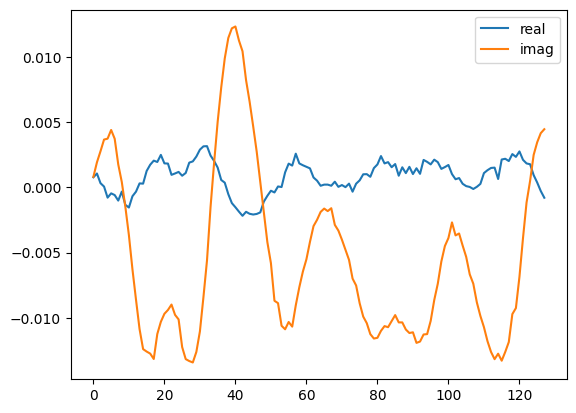

In [28]:
# datosPAM4SNR8[# de senal, real=0, imag =1, 128 datos]
#Parte real
plt.plot(datosPAM4SNR8[1,0,:], label = 'real')
#parte imaginaria
plt.plot(datosPAM4SNR8[1,1,:], label = 'imag')
plt.legend()

## Extraccion de caracteristicas

Podemos extraer caracteristicas de las señales, con el fin de reducir su dimensionalidad. La idea principal es construir una matriz, donde las filas sean las muestras, y las columnas las caracteristicas. Emplearemos la siguiente funcion para extraer 16 caracteristicas de cada señal.

In [29]:
#Form expert features
def form_features(X):

    #Form array of complex numbers; convert each (2,128) sample to a (128,) sample
    n_samples = X.shape[0]
    rows = X.shape[1]
    vec_len = X.shape[2]
    X_complex = []
    X_complex = [complex(X[samp_num,0,column],X[samp_num,1,column])
                 for samp_num in range(n_samples) for column in range(vec_len)]

    X_complex = np.vstack(X_complex)
    X_complex = np.reshape(X_complex, [n_samples,vec_len])
    X_complex_sqr = np.square(X_complex)
    X_complex_angl = np.angle(X_complex)

    #Form features: set of 16 expert features based on 0 cyclic time lag

    dict_16features = {}

    #Feature 1
    dict_16features['f1'] = np.array([np.mean(X_complex, axis=1)]).T

    #Feature 2
    dict_16features['f2'] = np.array([np.mean(abs(X_complex),axis = 1)]).T

    #Feature 3
    dict_16features['f3'] = np.array([np.mean(X_complex_angl, axis = 1)]).T

    #Feature 4
    dict_16features['f4'] = np.array([np.mean(abs(X_complex_angl), axis = 1)]).T

    #Feature 5
    dict_16features['f5'] = np.array([np.mean(X_complex_sqr, axis = 1)]).T

    #Feature 6
    dict_16features['f6'] = np.array([np.mean(np.square(abs(X_complex)), axis = 1)]).T

    #Feature 7
    dict_16features['f7'] = np.array([np.mean(np.square(X_complex_angl), axis = 1)]).T

    #Feature 8
    dict_16features['f8'] = np.array([np.mean(np.square(abs(X_complex_angl)), axis = 1)]).T

    #Feature 9
    dict_16features['f9'] = np.array([(np.mean(X_complex_sqr,axis = 1)) -
                   ((1/vec_len**2)*np.square(np.sum(X_complex, axis = 1)))]).T

    #Feature 10
    dict_16features['f10'] = np.array([(np.mean(np.square(abs(X_complex)), axis = 1)) -
                    ((1/vec_len**2)*np.square(np.sum(abs(X_complex), axis = 1)))]).T

    #Feature 11
    dict_16features['f11'] = np.array([(np.mean(np.square(X_complex_angl),axis = 1)) -
                    ((1/vec_len**2)*np.square(np.sum(X_complex_angl, axis = 1)))]).T

    #Feature 12
    dict_16features['f12'] = np.array([(np.mean(np.square(abs(X_complex_angl)), axis = 1)) -
                    ((1/vec_len**2)* np.square(np.sum(abs(X_complex_angl), axis = 1)))]).T

    #Feature 13
    dict_16features['f13'] = np.array([(np.mean(np.power(X_complex,4), axis = 1)) -
                    ((1/vec_len**2)*(np.sum(X_complex_sqr,1))**2)]).T

    #Feature 14
    dict_16features['f14'] = np.array([(np.mean(np.power(abs(X_complex),4), axis = 1)) -
                   ((1/vec_len**2)*(np.sum(np.square(abs(X_complex)), axis = 1))**2)]).T

    #Feature 15
    dict_16features['f15'] = np.array([(np.mean(np.power(X_complex_angl,4), axis =1)) -
                   ((1/vec_len**2)*(np.sum(np.square(X_complex_angl),axis = 1))**2)]).T

    #Feature 16
    dict_16features['f16'] = np.array([(np.mean(np.power(abs(X_complex_angl),4), axis =1) -
                   ((1/vec_len**2)*(np.sum(np.square(abs(X_complex_angl)),axis = 1))**2))]).T

    #Concatenate 16 feature arrays
    X_16 = []
    X_16 += dict_16features.values()
    X_16 = abs(np.hstack(np.array(X_16)))

    return X_16

In [30]:
features = form_features(datosPAM4SNR8)
print(features.shape)

(1000, 16)


Observamos que la variable features es una matriz de 1000 filas por 16 columnas. Donde las filas coinciden con el numero de muestras del esquema de modulacion 'PAM4' con SNR=8. Y en vez de tener arreglos de 2 filas por 128 columnas, ahora tenemos las 16 caracteristicas extraidas de las 1000 señales.

Ahora extraemos caracteristicas de las señales correspondientes a la modulacion 'GFSK' con SNR=8.

In [31]:
features2 = form_features(Xd[('GFSK',8)])
print(features2.shape)

(1000, 16)


Y obtenemos una matriz con 1000 muestras y 16 caracteristicas.

## Construccion de la matriz de datos para el algoritmo de Aprendizaje Automatico (Machine Learning)

Para entrenar un algoritmo de ML, necesitamos una tabla, donde las filas sean las muestras, y las columnas las caracteristicas. Tambien agregar una columna final donde va la etiqueta o clase de la muestra. Vamos a realiar un ejemplo tomando las caracteristicas que extraimos para la clase 'PAM4' y 'GFSK'. Como tenemos 1000 muestras por cada clase, debemos construir una matriz con 2000 muestras y 16 columnas. Con el comando `vstack` de numpy podemos concatenar las filas de ambas matrices, asi:

In [32]:
featureMatrix = np.vstack((features,features2))
featureMatrix.shape

(2000, 16)

Tambien necesita concatenar las etiquetas o clases de cada muestra, asi

In [33]:
#arreglo de numpy con 1000 veces 'PAM4' en forma de vector columna
pam4Labels = np.repeat('PAM4', 1000).reshape(-1,1)
#arreglo de numpy con 1000 veces 'GFSK' en forma de vector columna
gfskLabels = np.repeat('GFSK', 1000).reshape(-1,1)
labels = np.vstack((pam4Labels, gfskLabels))
print(np.unique(labels),labels.shape)

['GFSK' 'PAM4'] (2000, 1)


Y de esta manera indicamos que las primeras 1000 muestras son de la clase 'PAM4', y las ultimas 1000 son de la clase 'GFSK'.

## Transformación de características

Debido que las caraceterísticas extraidas son dependientes de las magnitudes medidas en las señales, procedemos a tranformar las magnitudes de las caracteristicas al mismo rango de valores. Para esto utilizamos la libreria `sklearn` para estandarizar las magnitudes de los datos usando el comando `StandardScaler`.
$$
z = (x-\mu)/\sigma
$$

In [34]:
import sklearn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
scaler.fit(featureMatrix)
features_transformed = scaler.transform(featureMatrix)

Ahora las caracteristicas deben tener media cero y varianza 1. Lo verificamos asi:

In [36]:
np.mean(features_transformed,axis=0)

array([-6.76569911e-16,  2.64379940e-08,  3.13807313e-15,  2.78821410e-15,
       -2.39830378e-15,  1.88232763e-15, -3.80573351e-15, -3.80573351e-15,
        1.87500016e-15,  1.92079685e-15,  2.27418084e-15,  7.08211267e-16,
       -7.39186490e-16, -1.00197628e-15, -1.57597546e-15, -1.57597546e-15])

In [37]:
np.var(features_transformed,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Finalmente guardamos los datos de las caracteristicas y las etiquetas en un diccionario usando Pickle

In [38]:
data = {'features':features_transformed,'labels':labels}
with open('dataset.pickle', 'wb') as handle:
    pickle.dump(data, handle)

Los datos se puede cargar en la memoria a partir del archivo de pickle, asi:

In [39]:
with open('dataset.pickle', 'rb') as handle:
    data2 = pickle.load(handle)

In [40]:
data2['features'].shape, data['labels'].shape

((2000, 16), (2000, 1))

## **Ejercicio**: Extraer los datos de los tipos de modulacion asignados por el docente. Se deben seleccionar los datos de un SNR unico, por ejemplo 2, para todos los métodos de modulación asignados. Realizar la extraccion de los datos, la construccion de la matriz de caracteristicas y de las etiquetas usando un ciclo `for`. Guardar los datos para ser usados posteriormente para el algoritmo de aprendizaje automático.

In [41]:
# Hacer codigo aqui
